# Non-Linear Kater's Pendulum

First we derive an equation of motion for the pendulum:

$\sum\tau=\tau_g=-\lvert\vec{F_g}\times\vec{d}\rvert=-Mgd\sin\theta=I_0\ddot{\theta}$

Where $\tau$ is the torque, $M$ is the total mass of the pendulum, $g$ is the gravitational constant, $d$ is the distance from the centre of mass to the point about which the pendulum is rotating, $I_0$ is the moment of inertia about the point of roatation, and $\ddot{\theta}$ is the angular acceleration.

Rearranging our equation of motion we get:

$\ddot{\theta}+\frac{Mgd}{I_0}\sin\theta=0$

This is a second order differential equation. The solution to this differential equation is not elementary, however, an exact analytical solution does exist in terms of Jacobi Elliptic Functions.

Following the derivation here: https://medium.com/physicsfromscratch/a-complete-solution-to-the-non-linear-pendulum-9afda0b64926

We get the solution:

$\theta(t)=2\arcsin(k\cdot cd(t\sqrt{\frac{Mgd}{I_0}}, k))$

Where $k$ is the elliptic modulus and $0 \le k^2 \le 1$.

However we also need an expression for the time period.

In the derivation we saw that:

$\frac{d\theta}{dt}=\sqrt{\frac{2Mgd}{I_0}(\cos(\theta)-\cos(\theta_0))}$

and so:

$\frac{dt}{d\theta}=\sqrt{\frac{I_0}{2Mgd}}\frac{1}{\sqrt{\cos(\theta)-\cos(\theta_0)}}$

From this we can derive an equation for the time period:

$T=4\sqrt{\frac{I_0}{2Mgd}}\int_{0}^{\theta_0}\frac{d\theta}{\sqrt{cos(\theta)-cos(\theta_0)}}$

This time period can be written in terms of an elliptic integral

$T=4\sqrt{\frac{I_0}{Mgd}}K(k)$

Where $k=\sin\frac{\theta_0}{2}$ and $K(k)$ is a complete elliptic integral of the first kind defined by

$K(k)=F(\frac{\pi}{2}, k)=\int_{0}^{\frac{\pi}{2}}\frac{du}{\sqrt{1-k^2sin^2(u)}}$

And so, from the moment of inertia calculated in the linear pendulum model:

$T_1=4\sqrt{\frac{I_c+Ml^2_1}{Mgl_1}}K(k)$

$T_2=4\sqrt{\frac{I_c+Ml^2_2}{Mgl_2}}K(k)$

Where $l_1$ and $l_2$ are the distances between each respective pivot point and the centre of mass.

Following the Legendre polynomial solution for the elliptic integral:

$T=2\pi\sqrt{\frac{I_0}{Mgd}}\sum_{n=0}^{\infty}(\frac{(2n-1)!!}{(2n)!!}\cdot k^{n})^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size':22})

# Set the font family to Cmr10
n = 'cmr10'
plt.rcParams['font.family'] = n
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = n
plt.rcParams['mathtext.it'] = n+':italic'
plt.rcParams['mathtext.bf'] = n+':bold'

from mpmath import *
dps = 25; pretty = True

In [2]:

def graph(angle_0):
    # Constants
    g = 9.81137 # Acceleration due to gravity
    L, W = 1.672, 0.01598 # Length and width of rod
    r_1, r_2 = 0.04701, 0.04701 # Radii of the cylinders
    P_1, P_2 = 0.338, 1.3324 # Positions of the knife edges
    m_1, x_1 = 1.261, L/2 # Mass of the rod and its centre of mass
    m_2, x_2 = 1.00256, 0.088 # Mass of the first cylinder and its centre of mass
    m_3, x_3 = 1.4048, 0.8 # Mass of the second cylinder and its centre of mass
    M = m_1 + m_2 + m_3 # Total mass
    C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Centre of mass position
    l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Distances from pivot to centre of mass
    R_1 = C_of_M - x_1 # Distances between centre of mass and the centres of mass of the the rod and two cylinders
    R_2 = C_of_M - x_2 
    R_3 = C_of_M - x_3 
    I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

    angle = float(angle_0 * pi / 180) # Initial angle in radians
    k = float(sin(angle/2)) # Elliptic modulus
    constant = sqrt((I_c + M * l_1 ** 2) / (M * g * l_1)) # From the formula for T
    T = 4 * constant * ellipk(k) # Time Period

    t = np.arange(0, 30, 0.1) # Time
    theta = np.zeros(300) # Angle

    for i in range(len(t)):
        theta[i] = angle

        u = t[i] * sqrt(constant ** -1)

        cd = ellipfun('cd', u, k)

        angle = re(2 * asin(k * cd))
    
    return t, theta

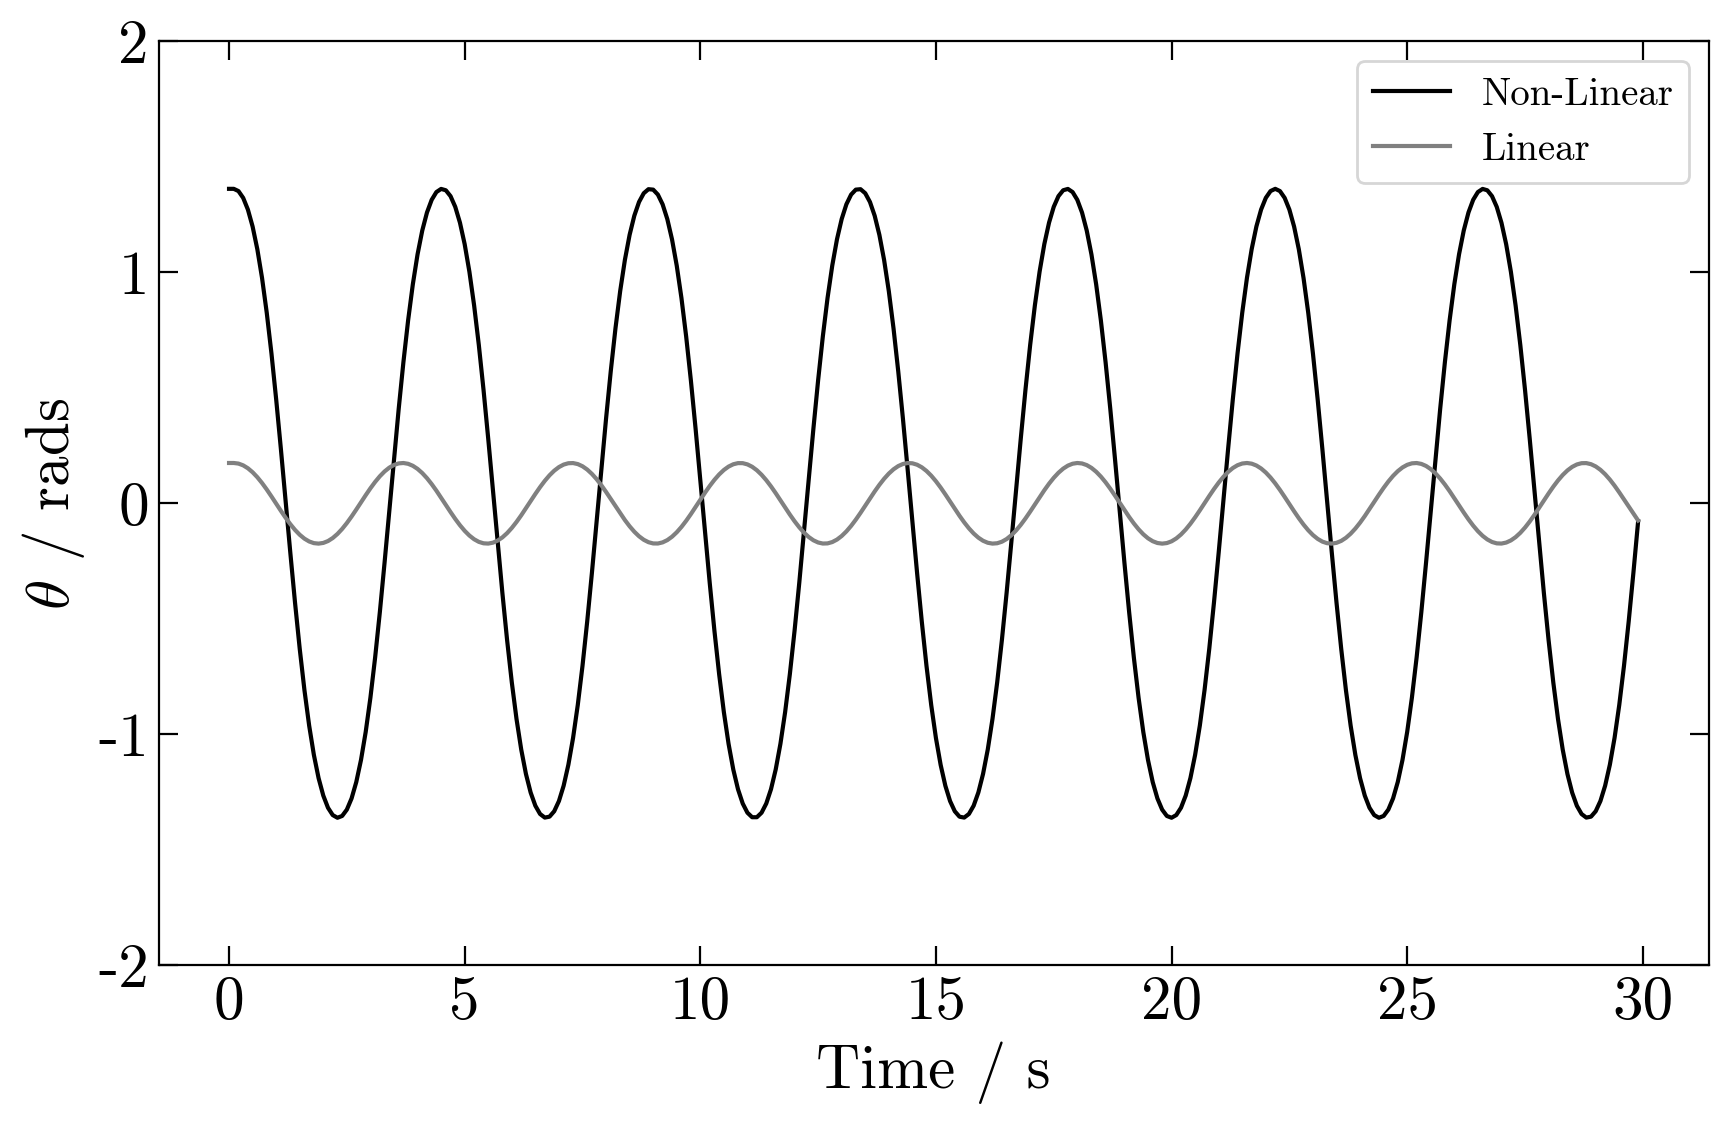

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

t1, theta1 = graph(78) # Large angle
t2, theta2 = graph(10) # Small angle

plt.plot(t1, theta1, color = 'black', label = 'Non-Linear')
plt.plot(t2, theta2, color = 'grey', label = 'Linear')

plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

plt.legend(fontsize = 14)
plt.xlabel('Time / s')
plt.ylabel(r'$\theta$ / rads')
plt.ylim(-2, 2)

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )
plt.margins()

plt.show()

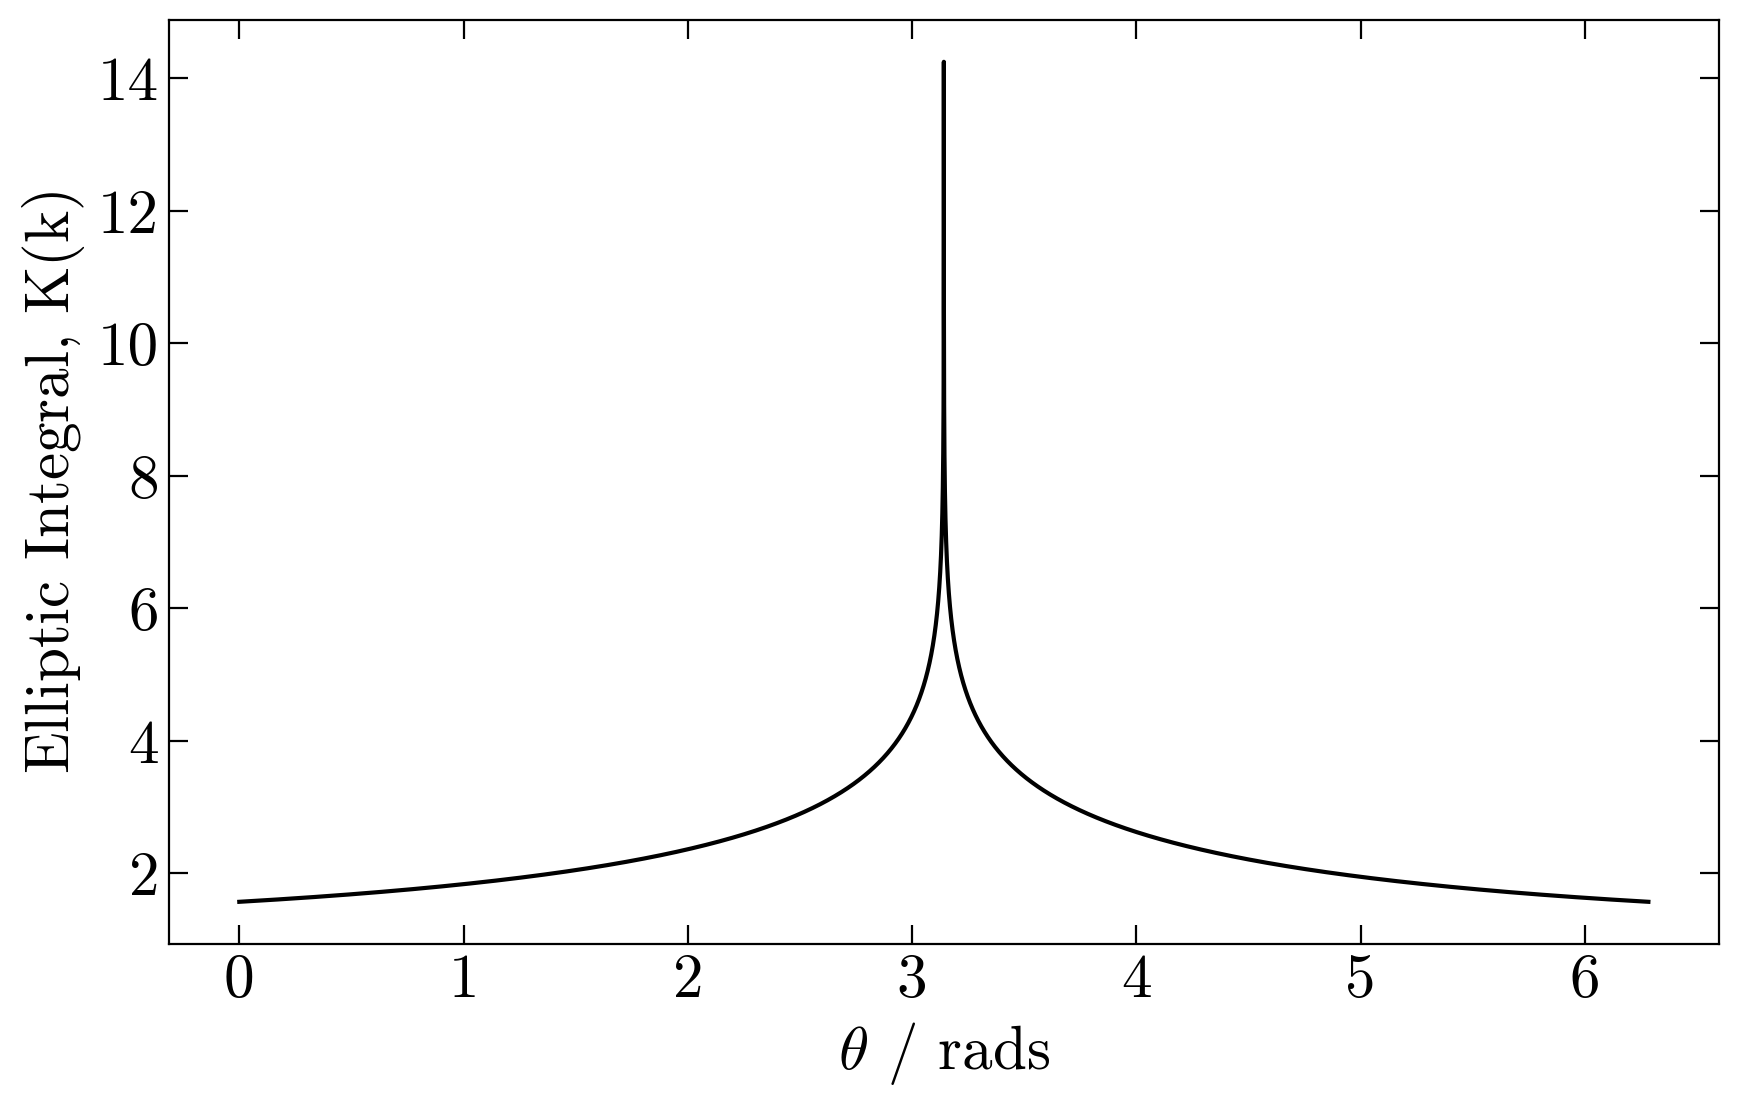

In [4]:
theta = np.arange(0, 2 * np.pi, 0.0001)
k = np.sin(theta/2)
K_integral = np.zeros(len(theta))

for i in range(len(theta)):
    K_integral[i] = ellipk(k[i])

fig = plt.figure(figsize=(10,6))

plt.plot(theta, K_integral, color = 'black')

plt.xlabel(r'$\theta$ / rads')
plt.ylabel(r'Elliptic Integral, $K(k)$')

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )
plt.margins()

plt.show()

At small angles, $K(k) \rightarrow \frac{\pi}{2}$ and,

$T = 4\sqrt{\frac{I_0}{Mgd}}K(k)$ becomes $T = 2\pi\sqrt{\frac{I_0}{Mgd}}$

At angles close to $\pi$, $K(k) \rightarrow \infty$